In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
smile = pd.read_csv('C:/Users/6106057/nss-data-analytics/projects/smile-on-the-dazzling-dentures/Data/smile.csv')

C:\Users\6106057\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
smile = smile.rename(columns ={'CallReportNum':'reportID','ReportVersion':'reg_clic',
                               'CallDateAndTimeStart':'callStart','CallDateAndTimeEnd':'callEnd',
                              'CityName':'city', 'CountyName':'county','CountryName':'country',
                              'PostalCode':'zipcode',
                               'SMILE ON 60+ Demographic Information - # of People in Household': 'num_household',
                               'Birth Year':'birth_year',
                               'SMILE ON 60+ Demographic Information - Other Language': 'language',
                               'SMILE ON 60+ Verification of Eligibility - Verification Date':'lastscreeningdate',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic':'dental_clinic',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?':'referral',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?' : 'mouth_teeth_quality',
                               'SMILE ON 60+ Demographic Information - Gender':'gender',
                               'SMILE ON 60+ Demographic Information - Race/Ethnicity': 'race',
                               'SMILE ON 60+ Demographic Information - Household Income Level':'income_level',
                               'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?':'last_time_visit',
                               'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?':'with_insurance',
                               'SMILE ON 60+ Screening - How often do you brush your teeth?': 'brush_teeth',
                               'SMILE ON 60+ Screening - Need for Periodontal Care':'future_care',
                               'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?':'treatment_completed',
                               'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?':'developed',
                               'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)':'social_six'
                              })

In [4]:
smile['income_level'] = smile['income_level'].str.replace(" ", "") 

In [5]:
list(smile.columns)

['Unnamed: 0',
 'reportID',
 'reg_clic',
 'LinkedToCallReportNum',
 'callStart',
 'callEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'city',
 'county',
 'StateProvince',
 'country',
 'zipcode',
 'Narrative',
 'EnteredByWorkerNum',
 'EnteredOn',
 'num_household',
 'birth_year',
 'language',
 'SMILE ON 60+ Screening - Last Screening Date',
 'lastscreeningdate',
 'dental_clinic',
 'referral',
 'SMILE ON 60+ Base-line Oral and Conditions Questions - Do you need help in these other areas?',
 'mouth_teeth_quality',
 'SMILE ON 60+ Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?',
 'SMILE ON 60+ Case Management Information - Transportation Barriers',
 'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
 'gender',
 'income_level',
 'SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?',
 'SMILE ON 60+ Demog

In [6]:
smile.groupby(['gender','race'])["CallerNum"].nunique().reset_index()

,gender,race,CallerNum
0,Female,African American,1766
1,Female,American Indian and Alaska Native,32
2,Female,Asian,92
3,Female,Caucasian,3776
4,Female,Hispanic,269
5,Female,Multi-racial,21
6,Female,Pacific Islander,6
7,Female,Unknown,61
8,Male,African American,891
9,Male,American Indian and Alaska Native,19


In [7]:
smile.treatment_completed

0        NaN
1        NaN
2         No
3         No
4         No
        ... 
57855    NaN
57856     No
57857    NaN
57858    NaN
57859     No
Name: treatment_completed, Length: 57860, dtype: object

# Geo - gender, birth year and race# 

In [8]:
smile_geo = smile[smile.columns[smile.columns.isin(['gender','birth_year','race','CallerNum'])]]
smile_geo.head()

,CallerNum,birth_year,gender,race
0,3638169,1960.0,Female,African American
1,4431194,1959.0,Female,Caucasian
2,2941341,1942.0,Male,Asian
3,3823933,1960.0,Male,African American
4,3348256,1955.0,Female,African American


In [9]:
over_60 = smile_geo[smile_geo['birth_year'] <= 1961.0]
over_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57791 entries, 0 to 57859
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CallerNum   57791 non-null  int64  
 1   birth_year  57791 non-null  float64
 2   gender      57278 non-null  object 
 3   race        51539 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [10]:
gender_race = over_60.groupby(['gender','race'])["CallerNum"].nunique().reset_index()
gender_race = gender_race.sort_values("CallerNum", ascending = False)

<ipython-input-11-859bd929bc76>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_race.index,rotation=90)


Text(0.5, 1.0, 'The number patients of in differnt Genders')

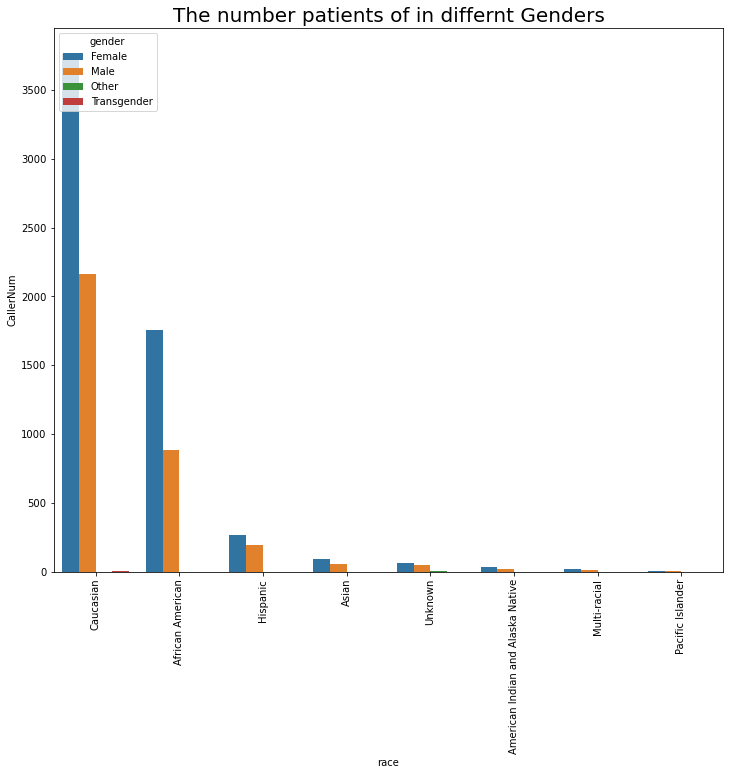

In [11]:
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.set_xticklabels(gender_race.index,rotation=90)
ax = sns.barplot(x="race", y="CallerNum" ,hue="gender", data=gender_race)
plt.title("The number patients of in differnt Genders", size=20)
## python barplot x rotation

# saving the picture: plt.savefig("The_number_patients_of_in differnt_Genders.png")

# look the income level and insurance

In [12]:
smile['income_level'] = smile['income_level'].str.replace(" ", "") 
## replace the black space in the "21 280"
smile['income_level'].value_counts()
## there is blank space on the 21280 income level. 

$0-$21280        42590
$21246-$24280     7332
$24281-$27315     2323
$28806-$32920     2016
$32921-$37035      645
$36366-$41560      236
$41561-$46755      206
$43926-$50200       58
$50201-$56475       55
$51486-$58840       26
$58841-$66195       22
$59046-$67480       18
$76121-$85635        8
$66606-$76120        4
$84761-$95355        4
$67481-$75915        3
$74166-$84760        2
Name: income_level, dtype: int64

In [13]:
insurance = smile.groupby(['with_insurance'])["CallerNum"].nunique().reset_index()
insurance = insurance.rename(columns = {"CallerNum": "Numbers"})
print(insurance)

  with_insurance  Numbers
0             No     9170
1            Yes      863


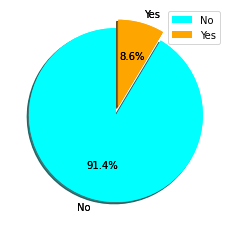

In [14]:
labels = insurance["with_insurance"]
sizes = insurance["Numbers"]
colors = ("cyan","orange") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
patches, texts, auto = ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.show()

## why only 8.6% holding insurance becasue of free med-care?

In [15]:
income_insurance = smile.groupby(["with_insurance","income_level"])["CallerNum"].nunique().reset_index()
income_insurance = income_insurance.rename(columns = {'with_insurance':'insuranced', 'CallerNum':'numbers'})
income_insurance

,insuranced,income_level,numbers
0,No,$0-$21280,6861
1,No,$21246-$24280,1182
2,No,$24281-$27315,369
3,No,$28806-$32920,311
4,No,$32921-$37035,114
5,No,$36366-$41560,44
6,No,$41561-$46755,52
7,No,$43926-$50200,16
8,No,$50201-$56475,11
9,No,$51486-$58840,5


In [16]:
income_insurance = income_insurance.sort_values("income_level", ascending = True)
income_insurance

,insuranced,income_level,numbers
0,No,$0-$21280,6861
17,Yes,$0-$21280,453
18,Yes,$21246-$24280,134
1,No,$21246-$24280,1182
19,Yes,$24281-$27315,51
2,No,$24281-$27315,369
3,No,$28806-$32920,311
20,Yes,$28806-$32920,45
4,No,$32921-$37035,114
21,Yes,$32921-$37035,18


Text(0.5, 0, 'numbers')

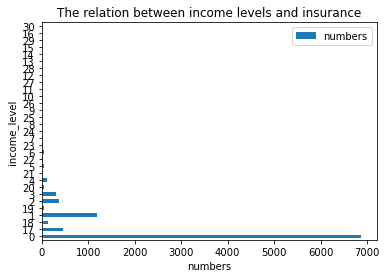

In [17]:
income_insurance.plot(kind="barh")
plt.title("The relation between income levels and insurance")
plt.ylabel("income_level")
plt.xlabel("numbers")
## the number of people visit insanure is too small, not very good on the graph. r

<ipython-input-18-a97065a9ba69>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_race.index,rotation=90)


Text(0.5, 1.0, 'The number of patient holds Insurance')

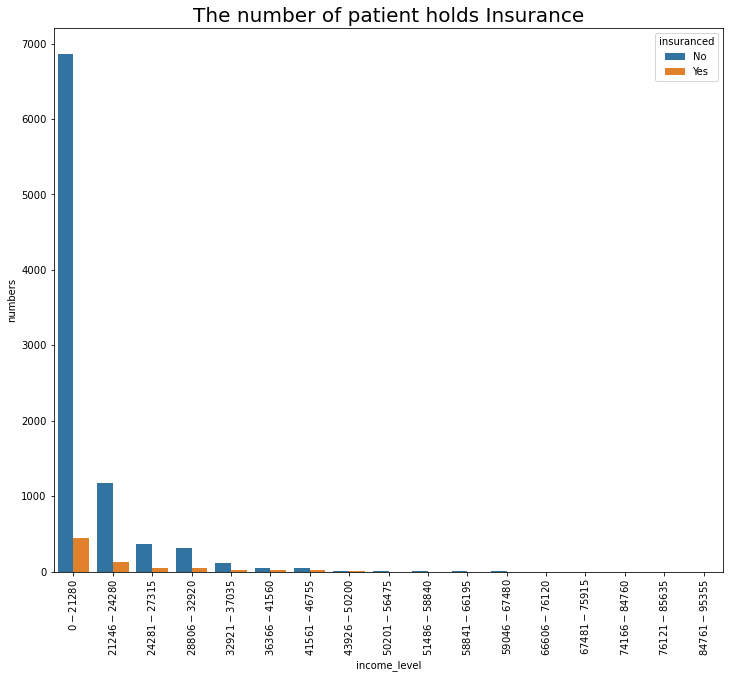

In [18]:
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.set_xticklabels(gender_race.index,rotation=90)
ax = sns.barplot(x="income_level", y="numbers" ,hue="insuranced", data=income_insurance)
plt.title("The number of patient holds Insurance", size=20)

# Explore the impact of the Smile On program and the outcomes that are produced for clients. Are clients seeing improvement through the Smile On program?

# Is there any correlation between procedures given and improved outcomes?

In [19]:
smile.future_care.value_counts()

No            3065
Yes           2846
Edentulous     197
Name: future_care, dtype: int64

In [20]:
smile["developed"].value_counts()

Yes    24526
No      1626
Name: developed, dtype: int64

In [31]:
process = smile.groupby(['treatment_completed','developed'],dropna = False)["CallerNum"].nunique().reset_index()
process = process.rename(columns = {'CallerNum':'numbers'})
process
## The number doesn't match the Smile.dataframe. Why? 
## becasue the groupby auto dorp the "NaN" out. 

,treatment_completed,developed,numbers
0,No,No,682
1,No,Yes,5235
2,No,NaN,817
3,Yes,No,473
4,Yes,Yes,3649
5,Yes,NaN,407
6,NaN,No,133
7,NaN,Yes,1137
8,NaN,NaN,10704


In [32]:
process.numbers.sum()
## the number from the smile.callernum count is: 9428. Why this one is so less? 

23237

In [30]:
process = process.sort_values("numbers", ascending = False)
prcoess

,treatment_completed,future_care,developed,social_six,numbers
90,NaN,NaN,NaN,NaN,10704
56,Yes,NaN,Yes,Yes,3132
27,No,NaN,Yes,No,3070
28,No,NaN,Yes,Yes,1212
29,No,NaN,Yes,NaN,1078
...,...,...,...,...,...
74,NaN,Yes,No,Yes,1
34,Yes,Edentulous,Yes,NaN,1
62,NaN,Edentulous,Yes,Yes,1
5,No,Edentulous,NaN,NaN,1


In [ ]:
process_1 = process(process)

In [23]:
treatment_successful = smile.apply(lambda x : True
                                  if (x['treatment_completed'] == 'Yes') & 
                                       (x['social_six'] == 'Yes') 
                                  else False, axis = 1)
print(treatment_successful)

0        False
1        False
2        False
3        False
4        False
         ...  
57855    False
57856    False
57857    False
57858    False
57859    False
Length: 57860, dtype: bool


In [24]:
treatment_successful.value_counts()

False    51105
True      6755
dtype: int64

In [25]:
completed_pivot = pd.pivot_table(smile, values=['CallerNum'],
                       index=['SMILE ON 60+ Site Information - Enroller ID'],
                       columns=['treatment_completed'], 
                       aggfunc=pd.Series.nunique)

print(completed_pivot)

                                                   CallerNum     
treatment_completed                                       No  Yes
SMILE ON 60+ Site Information - Enroller ID                      
Appalachian Miles for Smiles - Mobile                      7   94
Christ Community Health Services- Broad Avenue           237  141
Christ Community Health Services- Frayser                179  115
Christ Community Health Services- Hickory Hill           172  105
Christ Community Health Services- Raleigh                171   74
Christ Community Health Services- Third Street           115   83
Church Health Center - Memphis                           746  561
Friends in Need Health Center - Kingsport                279  219
Healing Hands Health Center - Bristol                    252  252
Interfaith Dental Clinic - Murfreesboro                  513  342
Interfaith Dental Clinic - Nashville                     761  525
Interfaith Health Clinic of Knoxville - Knoxville        369  343
Karis Dent

In [26]:
completed_pivot.CallerNum.sum()
##The number that doesn't match everytime. 

treatment_completed
No     5826
Yes    4126
dtype: int64